In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface

### Specify the folder where your sensor data is

In [3]:
folder_path = '../../sensordata'
ideal = IdealDataInterface(folder_path)

Found entries for 272 sensor readings.


### Which room types are available?

In [4]:
ideal.room_types()

room_type
bedroom         17
hall            12
livingroom       9
kitchen          9
bathroom         7
utility          6
outside          2
study            1
playroom         1
conservatory     1
Name: Number of rooms, dtype: int64

### What categories are available?

In [5]:
ideal.categories()

,category,subtype
0,electric-appliance,microwave
1,room,temperature
2,electric-appliance,kettle
3,room,light
4,tempprobe,radiator-input
5,electric-mains,electric-combined
6,tempprobe,central-heating-return
7,heatcook,light
8,room,humidity
9,electric-appliance,washingmachinetumbledrier


### Search for some sensors

In [6]:
ideal.view(homeid=105, subtype='hot-water-hot-pipe')

,homeid,roomid,room_type,category,subtype,sensorid
0,105,1110,kitchen,tempprobe,hot-water-hot-pipe,5083


In [7]:
ideal.view(homeid=105, subtype='sink')

,homeid,roomid,room_type,category,subtype,sensorid
0,105,1112,bathroom,tempprobe,sink,5247
1,105,1110,kitchen,tempprobe,sink,5259


In [8]:
data = ideal.get(sensorid=[5083, 5247])

len(data)

2

In [9]:
# Each item in data is a dictionary
data[0].keys()

dict_keys(['homeid', 'roomid', 'room_type', 'category', 'subtype', 'sensorid', 'readings'])

### Resample the temperature readings and combine them in one DataFrame

In [10]:
data[0]['subtype']

'sink'

In [11]:
assert data[0]['subtype'] == 'sink'

ts_hot_water = data[1]['readings']
ts_sink = data[0]['readings']

In [12]:
ts_hot_water = ts_hot_water.resample('5min').mean()
ts_sink = ts_sink.resample('5min').mean()

In [13]:
ts_combined = pd.concat([ts_hot_water, ts_sink], axis=1)

ts_combined /= 10

ts_combined.head()

,hot-water-hot-pipe,sink
time,,
2017-04-25 13:10:00,28.777778,NaN
2017-04-25 13:15:00,28.184211,NaN
2017-04-25 13:20:00,27.645833,NaN
2017-04-25 13:25:00,33.100000,NaN
2017-04-25 13:30:00,47.825000,NaN


### Have a peek into how that looks

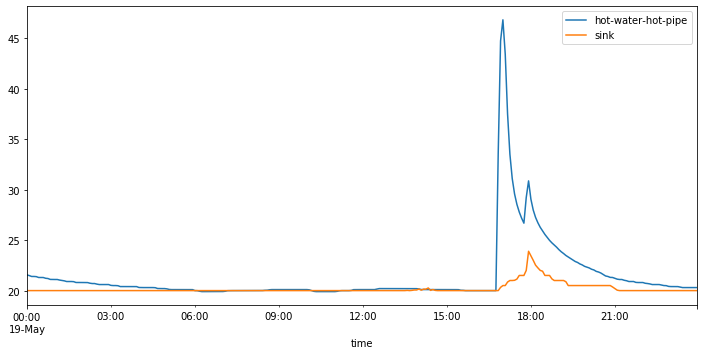

In [14]:
fig, ax = plt.subplots(figsize=(12,5.5))

idx = (ts_combined.index >= '2017-05-19') & (ts_combined.index < '2017-05-20')

ts_combined[idx].plot(ax=ax);